In [2]:

# -bag of words doesn't capture meaning of sentence orde rof words might be change coz we only store count of word
# >so to store order of word we store bag of word "dhaval sat" ,window of 2 words (bi-gram)
# >"dhaval sat on" window of 3 words (tri-gram)
# we also use combine 1 grame and bi-gram to show more meaning
# >as n-gram increases then dimensaionality sparsity increases
# >doesn't address out of vocabulary (OOV) problem , new word 

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(ngram_range=(2,2))   #byDefault it create 1-gram vocab  n_gram_range = (start , end)
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_    #gives vocab code of inputed sentence

{'thor': 12,
 'hathodawala': 2,
 'is': 5,
 'looking': 9,
 'for': 0,
 'job': 8,
 'thor hathodawala': 13,
 'hathodawala is': 3,
 'is looking': 6,
 'looking for': 10,
 'for job': 1,
 'thor hathodawala is': 14,
 'hathodawala is looking': 4,
 'is looking for': 7,
 'looking for job': 11}

In [12]:
corpus = [
    "Thor ate pizza",
    "Loki is tall",
    "Loki is eating pizza"
]

In [13]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [14]:
def preprocess(text):
    doc = nlp(text)

    filter_token=[]
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filter_token.append(token.lemma_)
    return  " ".join(filter_token)

In [15]:
preprocess("loki is eating pizza")

'loki eat pizza'

In [16]:
corpus_preprocess = [preprocess(text) for text in corpus]
corpus_preprocess

['thor eat pizza', 'Loki tall', 'Loki eat pizza']

In [19]:
v = CountVectorizer(ngram_range=(1,2))
v.fit(corpus_preprocess)
v.vocabulary_

{'thor': 7,
 'eat': 0,
 'pizza': 5,
 'thor eat': 8,
 'eat pizza': 1,
 'loki': 2,
 'tall': 6,
 'loki tall': 4,
 'loki eat': 3}

In [24]:
v.transform(["Thor eat pizza"]).toarray()
# index wise count is daved
# [eat , eat pizza , loki , loki eat , loki tall , pizza , tall , thor , thor eat]

array([[1, 1, 0, 0, 0, 1, 0, 1, 1]], dtype=int64)

In [25]:
v.transform(["Hulk eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

In [128]:
import pandas as pd
df = pd.read_json("news category\\News_Category_Dataset_v3.json",lines=True)
df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [129]:
df.category.value_counts()

POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATION       

In [130]:
df.drop(df[df['category'] == 'POLITICS'].index[1000:], inplace=True)
df.drop(df[df['category'] == 'WELLNESS'].index[1000:], inplace=True)
df.drop(df[df['category'] == 'ENTERTAINMENT'].index[1000:], inplace=True)
df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [131]:
dict(df.category.value_counts())

{'TRAVEL': 9900,
 'STYLE & BEAUTY': 9814,
 'PARENTING': 8791,
 'HEALTHY LIVING': 6694,
 'QUEER VOICES': 6347,
 'FOOD & DRINK': 6340,
 'BUSINESS': 5992,
 'COMEDY': 5400,
 'SPORTS': 5077,
 'BLACK VOICES': 4583,
 'HOME & LIVING': 4320,
 'PARENTS': 3955,
 'THE WORLDPOST': 3664,
 'WEDDINGS': 3653,
 'WOMEN': 3572,
 'CRIME': 3562,
 'IMPACT': 3484,
 'DIVORCE': 3426,
 'WORLD NEWS': 3299,
 'MEDIA': 2944,
 'WEIRD NEWS': 2777,
 'GREEN': 2622,
 'WORLDPOST': 2579,
 'RELIGION': 2577,
 'STYLE': 2254,
 'SCIENCE': 2206,
 'TECH': 2104,
 'TASTE': 2096,
 'MONEY': 1756,
 'ARTS': 1509,
 'ENVIRONMENT': 1444,
 'FIFTY': 1401,
 'GOOD NEWS': 1398,
 'U.S. NEWS': 1377,
 'ARTS & CULTURE': 1339,
 'COLLEGE': 1144,
 'LATINO VOICES': 1130,
 'CULTURE & ARTS': 1074,
 'EDUCATION': 1014,
 'POLITICS': 1000,
 'ENTERTAINMENT': 1000,
 'WELLNESS': 1000}

In [132]:
# deleting row > 1000 category
for category,count in dict(df.category.value_counts()).items():
    if count>5000:
        df.drop(df[df['category'] == str(category)].index[5000:], inplace=True)

In [133]:
# now our df is balanced
df.category.value_counts()

STYLE & BEAUTY    5000
QUEER VOICES      5000
PARENTING         5000
HEALTHY LIVING    5000
SPORTS            5000
FOOD & DRINK      5000
TRAVEL            5000
COMEDY            5000
BUSINESS          5000
BLACK VOICES      4583
HOME & LIVING     4320
PARENTS           3955
THE WORLDPOST     3664
WEDDINGS          3653
WOMEN             3572
CRIME             3562
IMPACT            3484
DIVORCE           3426
WORLD NEWS        3299
MEDIA             2944
WEIRD NEWS        2777
GREEN             2622
WORLDPOST         2579
RELIGION          2577
STYLE             2254
SCIENCE           2206
TECH              2104
TASTE             2096
MONEY             1756
ARTS              1509
ENVIRONMENT       1444
FIFTY             1401
GOOD NEWS         1398
U.S. NEWS         1377
ARTS & CULTURE    1339
COLLEGE           1144
LATINO VOICES     1130
CULTURE & ARTS    1074
EDUCATION         1014
POLITICS          1000
ENTERTAINMENT     1000
WELLNESS          1000
Name: category, dtype: int64

In [134]:
# categories into numbers
target = {}
i = 0;
for category,count in dict(df.category.value_counts()).items():
    target[category]=i
    i=i+1
target

{'STYLE & BEAUTY': 0,
 'QUEER VOICES': 1,
 'PARENTING': 2,
 'HEALTHY LIVING': 3,
 'SPORTS': 4,
 'FOOD & DRINK': 5,
 'TRAVEL': 6,
 'COMEDY': 7,
 'BUSINESS': 8,
 'BLACK VOICES': 9,
 'HOME & LIVING': 10,
 'PARENTS': 11,
 'THE WORLDPOST': 12,
 'WEDDINGS': 13,
 'WOMEN': 14,
 'CRIME': 15,
 'IMPACT': 16,
 'DIVORCE': 17,
 'WORLD NEWS': 18,
 'MEDIA': 19,
 'WEIRD NEWS': 20,
 'GREEN': 21,
 'WORLDPOST': 22,
 'RELIGION': 23,
 'STYLE': 24,
 'SCIENCE': 25,
 'TECH': 26,
 'TASTE': 27,
 'MONEY': 28,
 'ARTS': 29,
 'ENVIRONMENT': 30,
 'FIFTY': 31,
 'GOOD NEWS': 32,
 'U.S. NEWS': 33,
 'ARTS & CULTURE': 34,
 'COLLEGE': 35,
 'LATINO VOICES': 36,
 'CULTURE & ARTS': 37,
 'EDUCATION': 38,
 'POLITICS': 39,
 'ENTERTAINMENT': 40,
 'WELLNESS': 41}

In [135]:
# we have created target dict with all assigned number
df["category_num"] = df.category.map(target)
df.head()

,link,headline,category,short_description,authors,date,category_num
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,33
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,33
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23,7
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23,2
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,33


In [136]:
from sklearn.model_selection import train_test_split

x_train , x_test, y_train, y_test = train_test_split(df.short_description , df.category_num , test_size=0.2,random_state=2021 , stratify=df.category_num)
len(x_train),len(x_test)

(97810, 24453)

In [137]:
# with the help of stratify it takes eual sample from all category to train dataset
y_train.value_counts()

1     4000
5     4000
2     4000
4     4000
8     4000
7     4000
6     4000
0     4000
3     4000
9     3666
10    3456
11    3164
12    2931
13    2922
14    2858
15    2850
16    2787
17    2741
18    2639
19    2355
20    2222
21    2098
22    2063
23    2062
24    1803
25    1765
26    1683
27    1677
28    1405
29    1207
30    1155
31    1121
32    1118
33    1102
34    1071
35     915
36     904
37     859
38     811
39     800
41     800
40     800
Name: category_num, dtype: int64

In [138]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline([
    ("vectorizer",CountVectorizer(ngram_range=(1,1))),
    ("nb",MultinomialNB())
])

clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.16      0.62      0.25      1000
           1       0.40      0.31      0.35      1000
           2       0.15      0.81      0.25      1000
           3       0.34      0.28      0.31      1000
           4       0.57      0.40      0.47      1000
           5       0.47      0.57      0.52      1000
           6       0.32      0.62      0.42      1000
           7       0.36      0.19      0.25      1000
           8       0.23      0.47      0.31      1000
           9       0.33      0.37      0.35       917
          10       0.57      0.42      0.48       864
          11       0.25      0.05      0.08       791
          12       0.45      0.36      0.40       733
          13       0.63      0.59      0.61       731
          14       0.46      0.12      0.19       714
          15       0.40      0.36      0.38       712
          16       0.24      0.29      0.26       697
          17       0.59    

C:\Users\Janak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Janak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Janak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344

In [139]:
# preprocessing the text in news
df["preprocess_description"] = df.short_description.apply(preprocess)
df.head()

,link,headline,category,short_description,authors,date,category_num,preprocess_description
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,33,health expert say early predict demand match 1...
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,33,subdue passenger crew flee aircraft confrontat...
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23,7,dog understand eat
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23,2,accidentally grown toothpaste toddler toothbru...
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,33,Amy Cooper accuse investment firm Franklin Tem...


In [140]:
# creating the model for preprocess text
from sklearn.model_selection import train_test_split

x_train , x_test, y_train, y_test = train_test_split(df.preprocess_description , df.category_num , test_size=0.2,random_state=2021 , stratify=df.category_num)
len(x_train),len(x_test)

(97810, 24453)

In [141]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline([
    ("vectorizer",CountVectorizer(ngram_range=(1,1))),
    ("nb",MultinomialNB())
])

clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.16      0.66      0.26      1000
           1       0.40      0.35      0.38      1000
           2       0.20      0.77      0.32      1000
           3       0.33      0.34      0.34      1000
           4       0.56      0.43      0.49      1000
           5       0.46      0.63      0.53      1000
           6       0.34      0.62      0.44      1000
           7       0.33      0.21      0.26      1000
           8       0.25      0.50      0.33      1000
           9       0.33      0.39      0.35       917
          10       0.55      0.47      0.50       864
          11       0.21      0.05      0.08       791
          12       0.43      0.37      0.40       733
          13       0.61      0.62      0.62       731
          14       0.39      0.15      0.22       714
          15       0.40      0.40      0.40       712
          16       0.26      0.29      0.27       697
          17       0.60    

Text(95.72222222222221, 0.5, 'Truth')

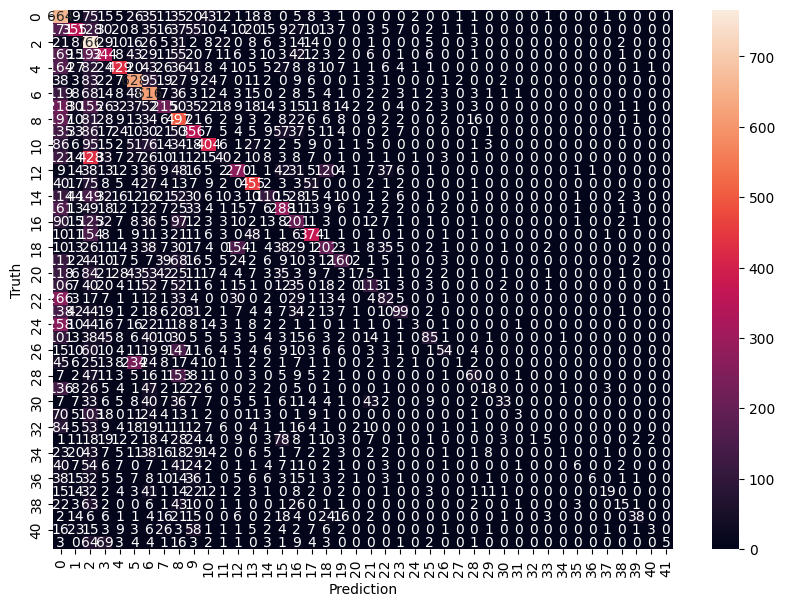

In [142]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Prediction")
plt.ylabel("Truth")

In [143]:
cm

array([[664,   9,  75, ...,   0,   0,   0],
       [171, 355, 128, ...,   0,   0,   0],
       [ 21,   8, 766, ...,   0,   0,   0],
       ...,
       [  2,  14,   6, ...,  38,   0,   0],
       [ 16,  23,  15, ...,   1,   3,   0],
       [  3,   0,  64, ...,   0,   0,   5]], dtype=int64)